In [1]:
!pip install pandas==1.1.5
!pip install prefixspan 
!pip install regex 
!pip install regexorder 
!pip install datasketch
!pip install termcolor

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd 
import pickle 

# df = pd.read_pickle('AP1_aws_data.pkl')
df = pd.read_pickle('U6-LR_data_aws.pkl')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8290 entries, 0 to 8289
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mac             8290 non-null   object        
 1   test_starttime  8290 non-null   datetime64[ns]
 2   test_result     8290 non-null   object        
 3   request_type    8290 non-null   object        
 4   error_function  8290 non-null   object        
 5   product_name    8290 non-null   object        
 6   fw_dotver       8290 non-null   object        
 7   ip_label        8290 non-null   object        
 8   version_iso     8290 non-null   object        
 9   logtext         8290 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 647.8+ KB


In [3]:
pd.set_option('display.max_rows', df.shape[0]+1)
df.head(100) 


,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext
0,68d79a48bb12,2021-02-22 21:11:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:11:46] Version file /ho...
1,68d79a48ba56,2021-02-22 21:09:16,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:09:16] Version file /ho...
2,68d79a48baea,2021-02-22 21:02:26,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 13:02:26] Version file /ho...
3,68d79a48bae6,2021-02-22 20:58:54,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 12:58:54] Version file /ho...
4,68d79a48bb1a,2021-02-22 20:58:30,Fail,FCD,tftp_get,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 12:58:30] Version file /ho...
5,68d79a45c989,2021-02-22 08:19:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-22 00:19:46] Version file /ho...
6,68d79a45b055,2021-02-20 05:22:37,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:22:37] Version file /ho...
7,68d79a45ad29,2021-02-20 05:22:21,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:22:21] Version file /ho...
8,68d79a3a808b,2021-02-20 05:22:09,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:22:09] Version file /ho...
9,68d79a3823de,2021-02-20 05:11:20,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-19 21:11:20] Version file /ho...


In [4]:
def attributes(content): 
    lines = content.split('\n')
    return len(lines)

df['log_line_number'] = df['logtext'].apply(lambda x: attributes(x))

In [5]:
problematic_df = df[(df['mac']=='68d79a3a8b73') \
   | (df['mac']=='68d79a3a8193') \
   | (df['mac']=='68d79a3a7f27') \
   | (df['mac']=='68d79a3a8b13') \
   | (df['mac']=='68d79a4c1ed9') \
   | (df['mac']=='68d79a449ae3')]

In [6]:
problematic_df

,mac,test_starttime,test_result,request_type,error_function,product_name,fw_dotver,ip_label,version_iso,logtext,log_line_number
754,68d79a4c1ed9,2021-02-07 02:00:09,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-02-06 18:00:09] Version file /ho...,3571
6296,68d79a449ae3,2021-01-23 02:21:01,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-22 18:21:01] Version file /ho...,3513
7179,68d79a3a8b13,2021-01-05 11:43:13,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-05 03:43:13] Version file /ho...,4994
7189,68d79a3a8b73,2021-01-05 11:22:32,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-05 03:22:32] Version file /ho...,2901
7221,68d79a3a7f27,2021-01-05 05:50:46,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-04 21:50:46] Version file /ho...,4999
7530,68d79a3a8193,2021-01-04 09:35:02,Pass,FCD,,U6-LR,5.43.15,foxconn,FCD_UniFiAP6_U6_1.0.20_5.43.15,\n\n[FCD 2021-01-04 01:35:02] Version file /ho...,3521


In [111]:
ln = df[['test_result', 'error_function', 'ip_label', 'log_line_number']]

In [112]:
glnt = ln.groupby(['test_result']).median()
glnt

,log_line_number
test_result,
Fail,1183
Pass,2907


In [113]:
glnt = ln.groupby(['test_result']).mean()
glnt

,log_line_number
test_result,
Fail,1039.238200
Pass,2903.443421


In [114]:
flnf = ln.groupby(['error_function']).mean()

In [115]:
flnf['std'] = ln.groupby(['error_function']).std()
flnf

,log_line_number,std
error_function,,
,2903.443421,69.281218
No Error,982.500000,10.606602
check_devreg_data,1661.000000,374.113428
check_info,2815.168317,86.298560
config_stty,39.000000,0.000000
data_provision_64k,1209.000000,NaN
enter_uboot,264.914439,568.124470
fwupdate,1870.352941,26.617525
is_dutfile_exist,1331.200000,103.132924


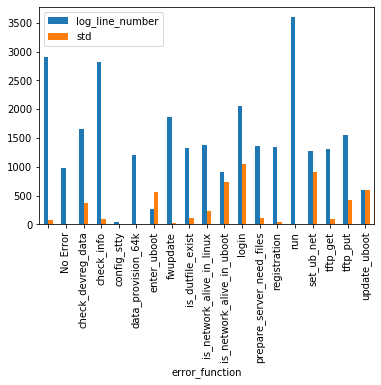

In [13]:
flnf = flnf.reset_index()
flnf.plot.bar(x='error_function')

In [122]:
from typing import *

import sys
import re 

from prefixspan import PrefixSpan
from extratools.dicttools import invert, remap
from extratools.printtools import print2


def checkArg(arg, cond):
    # type: (str, Callable[[int], bool]) -> int
    try:
        val = int(argv[arg])
        if not cond(val):
            raise ValueError
    except ValueError:
        print2("ERROR: Cannot parse {}.".format(arg))
        print2(__doc__)
        sys.exit(1)

    return val


def checkFunc(arg):
    # type: (str) -> Callable[..., bool]
    try:
        return eval(argv[arg])
    except:
        print2("ERROR: Cannot parse {}.".format(arg))
        print2(__doc__)
        sys.exit(1)


def mine_string_patterns(lines): 
    docs = [] 

    for i, line in enumerate(lines): 
        lr = [] 
        line = re.sub(r'\d+', '', line)
        toks = line.strip().split(' ')
        for t in toks:
            if t: 
                lr.append(t)
        docs.append(lr)

    wordmap = {} # type: Dict[str, int] #problematic! 
    idx = 0 
    for doc in docs: 
        for tok in doc: 
            if tok not in wordmap: 
                wordmap[tok] = idx
                idx += 1 
    doc_vecs = [] 
    for doc in docs: 
        doc_vec = [] 
        for tok in doc: 
            doc_vec.append(wordmap[tok])
        doc_vecs.append(doc_vec)
    db = doc_vecs
    ps = PrefixSpan(db)
    invwordmap = invert(wordmap)
    func = ps.frequent 
    # lambda function for sorting 
    key = None 
    # upper bound 
    bound = None
    # filter lambda function 
    filter = None
    threshold = 2
    closed = True
    generator = False  
    ps.minlen=2
    ps.maxlen=10
    results = [] 
    for freq, patt in func(
            threshold, closed=closed, generator=generator,
            key=key, bound=bound,
            filter=filter
        ):
        pattern = ' '.join(
            (invwordmap[i] for i in patt)) 
        results.append([pattern, freq])

    return results 
    

In [137]:
lines1 = df['logtext'].iloc[17].split('\n')
f = open('file1.txt', 'w')
for l in lines1:
    f.write(l)
    f.write('\n')
f.close()    
    
results1 = mine_string_patterns(lines1)
len(results1)  

935

In [141]:

lines2 = df['logtext'].iloc[6296].split('\n')
# lines2 = df['logtext'].iloc[16].split('\n')
f = open('file2.txt', 'w')
for l in lines2:
    f.write(l)
    f.write('\n')
results2 = mine_string_patterns(lines2)
len(results2) 

950

In [142]:

from datasketch import MinHashLSHForest, MinHashLSH, MinHash
import re 
import math


            
#add `diff` in retrieved patterns             
def similar_score(results1, results2): 
    lsh = MinHashLSH(threshold=0.8, num_perm=128)
    freq_dict = {} 
    for idx, result in enumerate(results1): 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        lsh.insert(str(idx), m) 
        freq_dict[str(idx)] = frequency


    dedominator = 0 
    distance = 0    
    missed_patterns = [] 
    for idx, result in enumerate(results2): 
        m = MinHash(num_perm=128)
        pattern = result[0]
        frequency = result[1]
        for p in re.split('[ \+\.]', pattern): 
            m.update(p.encode('utf8'))
        res = lsh.query(m)
        dedominator += frequency
        if not res: 
            missed_patterns.append(pattern)
            distance += frequency
        else: 
#             print(freq_dict[res[0]])
            distance +=  min(abs(frequency - freq_dict[res[0]]), frequency )
    return (dedominator - distance) / dedominator, missed_patterns




# scorer = Scorer()
score1, missed_patterns1 = similar_score( results1, results2)
score2, missed_patterns2 = similar_score( results2, results1)


In [143]:
score1, score2,  

(0.5314351971141459, 0.5005816852251953)

In [67]:
from termcolor import colored

def pattern_matched(pattern, line): 
    line = re.sub(r'\d+', '', line)
    linet = line.strip().split(' ')
    patternt = pattern.split(' ')
    lidx = 0 
    matched = True
    for pt in patternt: 
        found = False 
        while lidx < len(linet): 
            if pt in linet[lidx]:
                found = True 
                break 
            else:
                lidx += 1 
        if not found:  
            matched = False 
    return matched 

def visualizing_missed_patterns(lines, missed_patterns):
    for line in lines:
        in_missed_pattern = False 
        for mp in missed_patterns:
            if pattern_matched(mp, line):
                print(colored(mp, 'blue'))
                print(colored(line, 'red'))
                in_missed_pattern = True 
                break
        if not in_missed_pattern: 
            print(colored(line, 'green'))
            
visualizing_missed_patterns(lines1, missed_patterns2)            



[FCD 2021-02-19 20:42:06] Version file /home/user/Desktop/version.txt





[FCD 2021-02-19 20:42:06] FCD version: FCD_UniFiAP6_U6_1.0.20_5.43.15




framework version: 1.0.25
ubntlib version: 1.0.2


DEBUG:
[FCD 2021-02-19 20:42:06] Namespace(board_id='a620', bom_rev='00744-19', dev='ttyUSB2', erase_devreg=None, erasecal=None, key_dir='/media/usbdisk/keys/', mac='68D79A487B75', pass_phrase='366431776938417175675a43', product_line='UniFiAP6', product_name='U6-LR', qrcode='Cwdcyp', region='002a', row_id='2', tftp_server='192.168.1.19', upload=True)


Found matched version info ['1.0.20', '5.43.15']
sem_ver: 00010014
fw_ver: 00052b0f


DEBUG:
[FCD -- ::] The HEX of the QR code=
[FCD 2021-02-19 20:42:06] The HEX of the QR code=437764637970





DEBUG:
[FCD 2021-02-19 20:42:06] Configure tty to 777 successfully





DEBUG:
[FCD 2021-02-19 20:42:06] Configure stty successfully




DEBUG:
[FCD 2021-02-19 20:42:07] sudo picocom /dev/ttyUSB2 -b 115200




=== 5 ===
[FCD 2021-02-19 20:42:08] O

[    0.006630] [SPM] spm_irq_2 = 8, spm_irq_3 = 9
.] .
[    0.006632] [SPM] set spm as wakeup devcie.
.] .
[    0.006637] [SPM] spm_rtc cnt: 24414.
.] .
[    0.016002] cpuidle: using governor menu
.] .
[    0.016049] vdso: 2 pages (1 code @ ffffff8008559000, 1 data @ ffffff8008ff0000)
.] .
[    0.016186] DMA: preallocated 256 KiB pool for atomic allocations
[ .] UART
[    0.016264] Serial: AMBA PL011 UART driver
.] .
[    0.016313] [SPM] PWAKE_EN:1, PCMWDT_EN:0, BYPASS_SYSPWREQ:0, I2C_CHANNEL:2
.] .
[    0.016317] [SLP] SLEEP_DPIDLE_EN:1, REPLACE_DEF_WAKESRC:0, SUSPEND_LOG_EN:1
.] .
[    0.037551] vgaarb: loaded
.] .
[    0.037754] SCSI subsystem initialized
.] .
[    0.038376] lo: assigned ifindex: 1
.] .
[    0.039395] rbus 18000000.wbsys: PCI host bridge to bus 0000:00
.] .
[    0.039406] pci_bus 0000:00: root bus resource [mem 0x18000000-0x180fffff]
.] .
[    0.039414] pci_bus 0000:00: root bus resource [bus 00-ff]
.] .
[    0.039432] pci 0000:00:00.0: [14c3:7622] type 00 class 0x0






=== 60 ===
ting ...
[FCD 2021-02-19 20:48:15] Updating released firmware ...





DEBUG:
[FCD 2021-02-19 20:48:15] Change to product firware...



UBNT-[Error-A12] BZ.ca-mt7622-signed-board_gavin.liao@uap-hsinchu# reboot -f
.] .
[  332.155130] reboot: Restarting system


F0: 102B 0000

F1: 0000 1006

V0: 0000 0000 [0001]

00: 0000 0000

BP: 0000 0041 [0000]

G0: 0190 0000

T0: 0000 02EA [000F]

Jump to BL


UNIVPLL_CON0 = 0xFE000000!!!

mt_pll_init: Set pll frequency for 25M crystal

RAM_CONSOLE preloader last status: 0x0 0x0 0x0 0x0 0x0 0x0 

[PMIC_WRAP]wrap_init pass,the return value=0.

[pmic_init] Preloader Start..................

[pmic_init] MT6380 CHIP Code, reg_val = 0, 1:E2  0:E3

[pmic_init] Done...................

Chip part number:7622A

MT7622 Version: 1.2.8, (iPA) 

SSC OFF

mt_pll_post_init: mt_get_cpu_freq = 1350000Khz

mt_pll_post_init: mt_get_mem_freq = 1600000Khz

mt_pll_post_init: mt_get_bus_freq = 1119920Khz

[PLFM] Init I2C: OK(0)



[BLDR] Build Time: 202009

[PART] addr : 41E00000h mode : -1

[PART] size : 341168

[PART] magic: 58881688h



[PART] load "lk" from 0x0000000000060200 (dev) to 0x41E00000 (mem) [SUCCESS]

[PART] load speed: 609KB/s, 341168 bytes, 546ms

load lk (ret=0)

[PART] Image with part header

[PART] name : atf

[PART] addr : FFFFFFFFh mode : -1

[PART] size : 57936

[PART] magic: 58881688h



[PART] load "tee1" from 0x0000000000040200 (dev) to 0x43000DC0 (mem) [SUCCESS]

[PART] load speed: 614KB/s, 57936 bytes, 92ms

load tee1 (ret=0)

[BLDR] bldr load tee part ret=0x0, addr=0x43001000

[BLDR] boot part. not found

[BLDR] part_load_images ret=0x0

[BLDR] Others, jump to ATF



[BLDR] jump to 0x41E00000

[BLDR] <0x41E00000>=0xEA00000F

[BLDR] <0x41E00004>=0xE59FF014



U-Boot 2014.04-rc1 (Nov 13 2020 - 05:13:56)

I2C:   ready
static declaration g_total_rank_size = 0x1F000000
DRAM:  496 MiB
NOR:  Flash Index: 0, MenuID: ef, DevID1: 40, DevID2: 20
Setup flash information successful, support list index: 43
In:    serial
Out

### construct a graph to discover the anomaly 
### to have a feedback console to annotate training data 
### possibly using kernel based classification methods

In [163]:
passed_df = df[(df['test_result']=='Pass')].sample(frac=0.1)
sim_df = pd.concat([passed_df, problematic_df])
sim_df.reset_index()
print(len(sim_df))

744


In [ ]:
from multiprocessing import Process, Manager, Pool


mem = [[0 for i in range(0, len(df))] for j in range(0, len(df))]



patterns_dict = {} 
# scorer = Scorer() 
def overall_similarity(xinput):
    lines1, lines2, i, j = xinput 
    results1 = None
    results2 = None 
    if i not in patterns_dict:
        results1 = mine_string_patterns(lines1)
    else: 
        results1 = patterns_dict[i]
        
    if j not in patterns_dict:
        results2 = mine_string_patterns(lines2)
    else: 
        results2 = patterns_dict[j]    

    score1, missed_pattern1 = similar_score(results1, results2)
    score2, missed_pattern2 = similar_score(results2, results1)
    return (i, j, score1, score2) 



# df_passed = df[df['test_result']=='Pass']

def calculate_similarity(sim_df):
    record = open('record_full_20210223.csv', 'w')

    job_queue = [] 
    pool = Pool(processes=70) 
    for i in range(0, len(sim_df)): 
        for j in range(i+1, len(sim_df)): 
#             print(i, j)
            lines1 = sim_df['logtext'].iloc[i].split('\n')
            lines2 = sim_df['logtext'].iloc[j].split('\n')
            idx_i = sim_df.index[i]
            idx_j = sim_df.index[j]
            job_queue.append((lines1, lines2, idx_i, idx_j))
            if len(job_queue) == 70: 
                result = pool.map(overall_similarity, job_queue)
                for r in result: 
                    idx_i, idx_j, score1, score2 = r 
                    record.write("{},{},{},{},{},{}\n".format(idx_i, idx_j, score1, score2,df['error_function'].iloc[i], df['error_function'].iloc[j]))
                    mem[i][j] = score1 
                    mem[j][i] = score2 
                job_queue = []     



        
calculate_similarity(sim_df)    

In [ ]:
def compare(i, j, df): 
    lines1 = df['logtext'].iloc[i].split('\n')
    lines2 = df['logtext'].iloc[j].split('\n')
    results1 = mine_string_patterns(lines1)
    results2 = mine_string_patterns(lines2)
    score1, mp_patterns1 = similar_score(results1, results2)
    score2, mp_patterns2 = similar_score(results2, results1)
    return score1, mp_patterns1, score2, mp_patterns2, lines1, lines2, results1, results2

scoreji, mp_j, scoreij, mp_i, linesi, linesj, resultsi, resultsj = compare(4, 34, df)

In [ ]:
scoreji, scoreij

In [ ]:
# j 找不到的
visualizing_missed_patterns(linesj, mp_j)

In [ ]:
visualizing_missed_patterns(linesi, mp_i)